In [1]:
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.layers
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pathlib
import PIL.Image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
from PIL import Image
from time import time
from glob import glob


In [3]:
path="C:\\Users\\aryan\\Downloads\\COV\\chest_xray"
path=pathlib.Path(path)
path

WindowsPath('C:/Users/aryan/Downloads/COV/chest_xray')

In [4]:
    train_normal=list(path.glob('train/NORMAL/*')),
    train_pneumonia=list(path.glob('train/PNEUMONIA/*')),
    test_normal=list(path.glob('test/NORMAL/*')),
    test_pneumonia=list(path.glob('test/PNEUMONIA/*')),
    val_normal=list(path.glob('val/NORMAL/*')),
    val_pneumonia=list(path.glob('val/PNEUMONIA/*'))

In [5]:
trainloc={
    "normal":list(path.glob('train/NORMAL/*')),
    "pneumonia":list(path.glob('train/PNEUMONIA/*')),
}
testloc={
    "normal":list(path.glob('test/NORMAL/*')),
    "pneumonia":list(path.glob('test/PNEUMONIA/*')),
}
valloc={
    "normal":list(path.glob('val/NORMAL/*')),
    "pneumonia":list(path.glob('val/PNEUMONIA/*'))
}

target={
    "normal":0,
    "pneumonia":1,
}

(1306, 1974, 3)


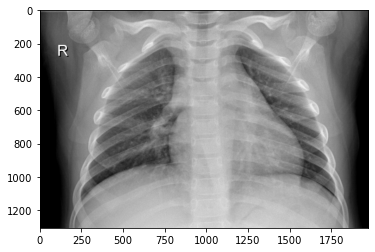

In [6]:
x=cv2.imread(str(trainloc['normal'][5]))
print(x.shape)
plt.imshow(x)

(712, 1272, 3)


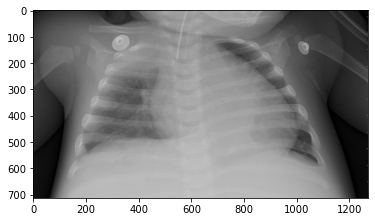

In [7]:
y=cv2.imread(str(trainloc['pneumonia'][999]))
print(y.shape)
plt.imshow(y)

In [8]:
for x,y in trainloc.items():
    print(x)
    print(len(y))

normal
1341
pneumonia
3875


In [9]:
for x,y in testloc.items():
    print(x)
    print(len(y))

normal
234
pneumonia
390


In [10]:
xtrain,ytrain=[],[]
for a,b in trainloc.items():
    for image in b:
        img=cv2.imread(str(image))
        xtrain.append(cv2.resize(img,(224,224)))
        ytrain.append(target[a])

In [11]:
xtest,ytest=[],[]
for a,b in trainloc.items():
    for image in b:
        img=cv2.imread(str(image))
        xtest.append(cv2.resize(img,(224,224)))
        ytest.append(target[a])

In [12]:
xval,yval=[],[]
for a,b in trainloc.items():
    for image in b:
        img=cv2.imread(str(image))
        xval.append(cv2.resize(img,(224,224)))
        yval.append(target[a])

In [13]:
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)

In [14]:
xtest=np.array(xtest)
ytest=np.array(ytest)

In [15]:
xval=np.array(xval)
yval=np.array(yval)

In [16]:
xtrain.shape

(5216, 224, 224, 3)

In [17]:
ytrain.shape

(5216,)

XNet

In [18]:
from keras import layers
from keras.initializers import glorot_uniform
from tensorflow import keras

In [19]:
xnet=keras.Sequential([
    layers.Conv2D(input_shape=((224,224,3)),filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer=glorot_uniform),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer=glorot_uniform),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer=glorot_uniform),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer=glorot_uniform),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(units=2048,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=1024,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=512,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid',kernel_initializer=glorot_uniform)
    
    
    
])

In [20]:
#num_training_steps

xnet.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
checkpoint_filepath = "best_model"
early_stopping = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor = 'val_accuracy', mode = "max", save_best_only=True, save_weights_only=True)
history = xnet.fit(xtrain, ytrain, epochs = 10, batch_size = 32,
                   steps_per_epoch = 10,validation_data = (xval, yval),
                   callbacks = [early_stopping, checkpoint])

Epoch 1/10
10/10 [==============================] - 120s 12s/step - loss: 356.2656 - accuracy: 0.5750 - val_loss: 0.8102 - val_accuracy: 0.7433
Epoch 2/10
10/10 [==============================] - 111s 12s/step - loss: 1.3522 - accuracy: 0.6906 - val_loss: 0.4336 - val_accuracy: 0.8173
Epoch 3/10
10/10 [==============================] - 105s 11s/step - loss: 0.4691 - accuracy: 0.7625 - val_loss: 0.3541 - val_accuracy: 0.8355
Epoch 4/10
10/10 [==============================] - 104s 11s/step - loss: 0.3276 - accuracy: 0.8469 - val_loss: 0.3371 - val_accuracy: 0.8558
Epoch 5/10
10/10 [==============================] - 103s 11s/step - loss: 0.3271 - accuracy: 0.8469 - val_loss: 0.3372 - val_accuracy: 0.8599
Epoch 6/10
10/10 [==============================] - 107s 11s/step - loss: 0.3427 - accuracy: 0.8344 - val_loss: 0.3012 - val_accuracy: 0.8526
Epoch 7/10
10/10 [==============================] - 106s 11s/step - loss: 0.4301 - accuracy: 0.8125 - val_loss: 0.4415 - val_accuracy: 0.7690
Epoc

In [22]:
loss,accuracy=xnet.evaluate(xtest,ytest)
pred=xnet.predict(xtest)
print(loss)
print(accuracy)

163/163 [==============================] - 65s 397ms/step - loss: 0.2823 - accuracy: 0.8783
0.28234028816223145
0.8782591819763184


<AxesSubplot:>

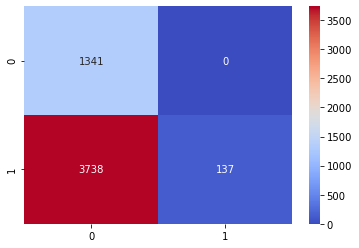

In [25]:
import seaborn as sns
sns.heatmap(tf.math.confusion_matrix(ytest,pred),annot=True,cmap='coolwarm',fmt='d')

In [26]:
pred2=xnet.predict(xval)

<AxesSubplot:>

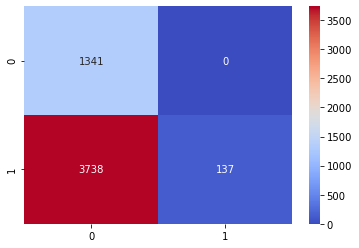

In [28]:
sns.heatmap(tf.math.confusion_matrix(ytest,pred2),annot=True,cmap='coolwarm',fmt='d')